# Final L·∫≠p tr√¨nh x·ª≠ l√≠ d·ªØ li·ªáu
## ƒê·ªÅ b√†i: 

### Ph√¢n t√≠ch bi·∫øn ƒë·ªông gi√° c·ªï phi·∫øu

## B√†i l√†m:

### **1.0.** Tr∆∞·ªõc ti√™n, import c√°c th∆∞ vi·ªán c·∫ßn:

In [97]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **1.1.** Ch·ªçn c·ªï phi·∫øu:
 C·ªï phi·∫øu ƒë∆∞·ª£c ch·ªçn l√† c·ªßa Tencent Holdings Limited (vi·∫øt t·∫Øt: THL) ƒë∆∞·ª£c ni√™m y·∫øt ch√≠nh th·ª©c tr√™n s√†n ch·ª©ng kho√°n H·ªìng K√¥ng (HKEX) v·ªõi m√£ c·ªï phi·∫øu 0700.HK. Th·ªùi gian kh·∫£o s√°t l√† 5 nƒÉm (2020-2025). Ngu·ªìn d·ªØ li·ªáu t·ª´ Yahoo Finance ‚Äì ƒë∆∞·ª£c coi l√† t∆∞∆°ng ƒë·ªëi ƒë√°ng tin c·∫≠y trong gi·ªõi ƒë·∫ßu t∆∞, tuy nhi√™n m·ªôt s·ªë sai s·ªë nh·ªè ho·∫∑c ch√™nh l·ªách th·ªùi gian v·∫´n c√≥ th·ªÉ x·∫£y ra.

 ### **1.2.** Thu th·∫≠p d·ªØ li·ªáu gi√° c·ªï phi·∫øu:
 Ta s·∫Ω d√πng th∆∞ vi·ªán yfinance ƒë·ªÉ l·∫•y d·ªØ li·ªáu c·ªï phi·∫øu Tencent.

In [98]:
symbol = "0700.HK"
df = yf.Ticker(symbol).history(period = "5y").reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df.to_csv("tencent_stock_data.csv", index=False, encoding="utf-8-sig")
df.head()

Date        Open        High         Low       Close  \
0 2020-06-19 00:00:00+08:00  408.800949  415.584540  407.372818  410.943115   
1 2020-06-22 00:00:00+08:00  410.586096  423.617744  409.872031  423.260712   
2 2020-06-23 00:00:00+08:00  428.437689  445.039665  424.153327  443.968567   
3 2020-06-24 00:00:00+08:00  448.074431  450.752161  438.077545  438.077545   
4 2020-06-26 00:00:00+08:00  434.150203  440.041198  431.650974  432.900574   

     Volume  Dividends  Stock Splits  
0  27479164        0.0           0.0  
1  28164190        0.0           0.0  
2  33983938        0.0           0.0  
3  25018502        0.0           0.0  
4  19393757        0.0           0.0

### **1.3.** L√†m s·∫°ch v√† ti·ªÅn x·ª≠ l√≠:


**1.3.1** Ki·ªÉm tra missing value:

Theo th√¥ng b√°o ch√≠nh th·ª©c t·ª´ HKEX, s√†n ti·∫øn h√†nh giao d·ªãch v√†o c√°c ng√†y t·ª´ th·ª© 2 ƒë·∫øn th·ª© 6, tr·ª´ c√°c ng√†y ngh·ªâ l·ªÖ theo l·ªãch c·ªßa HongKong. V·ªõi nh·ªØng ng√†y ngh·ªâ, t·ªïng kh·ªëi l∆∞·ª£ng giao d·ªãch (Volume) s·∫Ω b·∫±ng 0. Ta t√¨m v√† lo·∫°i b·ªè nh·ªØng ng√†y n√†y.

In [99]:
df = df[df['Volume'] > 0]  
df.head()

Date        Open        High         Low       Close  \
0 2020-06-19 00:00:00+08:00  408.800949  415.584540  407.372818  410.943115   
1 2020-06-22 00:00:00+08:00  410.586096  423.617744  409.872031  423.260712   
2 2020-06-23 00:00:00+08:00  428.437689  445.039665  424.153327  443.968567   
3 2020-06-24 00:00:00+08:00  448.074431  450.752161  438.077545  438.077545   
4 2020-06-26 00:00:00+08:00  434.150203  440.041198  431.650974  432.900574   

     Volume  Dividends  Stock Splits  
0  27479164        0.0           0.0  
1  28164190        0.0           0.0  
2  33983938        0.0           0.0  
3  25018502        0.0           0.0  
4  19393757        0.0           0.0

Ngo√†i ra, trong c√°c phi√™n giao d·ªãch c·ªßa HKEX, t·ªìn t·∫°i nh·ªØng phi√™n giao d·ªãch n·ª≠a ng√†y, s·∫Ω k·∫øt th√∫c v√†o 12h tr∆∞a thay v√¨ 16h chi·ªÅu nh∆∞ b√¨nh th∆∞·ªùng. N√≥ c√≥ th·ªÉ l√†m cho t·ªïng kh·ªëi l∆∞·ª£ng giao d·ªãch c·ªßa c·ªï phi·∫øu (Volume) th·∫•p h∆°n b√¨nh th∆∞·ªùng. C√°c phi√™n giao d·ªãch c≈©ng c√≥ th·ªÉ ng·∫Øt khi ch·ªâ s·ªë th·ªã tr∆∞·ªùng gi·∫£m m·∫°nh trong m·ªôt th·ªùi gian ng·∫Øn (Circurt break), khi c√≥ s·ª± c·ªë kƒ© thu·∫≠t ho·∫∑c c√°c th·∫£m h·ªça thi√™n nhi√™n. T·∫•t c·∫£ s·ª± gi√°n ƒëo·∫°n b·∫•t th∆∞·ªùng tr√™n ƒë·ªÅu ·∫£nh h∆∞·ªüng √≠t nhi·ªÅu ƒë·∫øn c√°c ch·ªâ s·ªë, ƒë·∫∑c bi·ªát l√† Volume. Ta c≈©ng c·∫ßn lo·∫°i b·ªè c√°c d·ªØ li·ªáu n√†y.

HKEX c√≥ cung c·∫•p l·ªãch giao d·ªãch h·∫±ng nƒÉm. T·ª´ l·ªãch n√†y, ta x√°c minh ƒë∆∞·ª£c nh·ªØng phi√™n n·ª≠a ng√†y trong kho·∫£ng th·ªùi gian kh·∫£o s√°t, bao g·ªìm:



| date       | note                    | type     |
|------------|-------------------------|----------|
| 2020-12-24 | Christmas Eve           | half-day |
| 2020-12-31 | New Year‚Äôs Eve          | half-day |
| 2021-02-09 | Lunar New Year‚Äôs Eve    | half-day |
| 2021-12-24 | Christmas Eve           | half-day |
| 2021-12-31 | New Year‚Äôs Eve          | half-day |
| 2022-01-31 | Lunar New Year‚Äôs Eve    | half-day |
| 2024-02-09 | Lunar New Year‚Äôs Eve    | half-day |
| 2024-12-24 | Christmas Eve           | half-day |
| 2024-12-31 | New Year‚Äôs Eve          | half-day |
| 2025-01-28 | Lunar New Year‚Äôs Eve    | half-day |
| 2025-12-24 | Christmas Eve           | half-day |
| 2025-12-31 | New Year‚Äôs Eve          | half-day |


Ti·∫øn h√†nh lo·∫°i b·ªè nh·ªØng ng√†y n√†y kh·ªèi d·ªØ li·ªáu:

In [100]:
half_day_dates = [
    "2020-12-24", "2020-12-31", "2021-02-09", "2021-12-24", "2021-12-31",
    "2022-01-31", "2024-02-09", "2024-12-24", "2024-12-31",
    "2025-01-28", "2025-12-24", "2025-12-31"
]
half_day_dates = pd.to_datetime(half_day_dates)

df_filtered = df[~df['Date'].isin(half_day_dates)]
df = df_filtered

df.head()

Date        Open        High         Low       Close  \
0 2020-06-19 00:00:00+08:00  408.800949  415.584540  407.372818  410.943115   
1 2020-06-22 00:00:00+08:00  410.586096  423.617744  409.872031  423.260712   
2 2020-06-23 00:00:00+08:00  428.437689  445.039665  424.153327  443.968567   
3 2020-06-24 00:00:00+08:00  448.074431  450.752161  438.077545  438.077545   
4 2020-06-26 00:00:00+08:00  434.150203  440.041198  431.650974  432.900574   

     Volume  Dividends  Stock Splits  
0  27479164        0.0           0.0  
1  28164190        0.0           0.0  
2  33983938        0.0           0.0  
3  25018502        0.0           0.0  
4  19393757        0.0           0.0

**1.3.2** Ki·ªÉm tra tr√πng l·∫∑p:

In [101]:
if (df.duplicated().sum()) == 0:
    print("D·ªØ li·ªáu kh√¥ng c√≥ gi√° tr·ªã tr√πng n√™n kh√¥ng c·∫ßn lo·∫°i b·ªè d√≤ng")
else:
    print("D·ªØ li·ªáu c√≥ gi√° tr·ªã thi·∫øu")    

D·ªØ li·ªáu kh√¥ng c√≥ gi√° tr·ªã tr√πng n√™n kh√¥ng c·∫ßn lo·∫°i b·ªè d√≤ng


**1.3.3** Chuy·ªÉn c·ªôt ng√†y th√°ng v·ªÅ ƒë·ªãnh d·∫°ng `datetime`

In [102]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

Date        Open        High         Low       Close  \
0 2020-06-19 00:00:00+08:00  408.800949  415.584540  407.372818  410.943115   
1 2020-06-22 00:00:00+08:00  410.586096  423.617744  409.872031  423.260712   
2 2020-06-23 00:00:00+08:00  428.437689  445.039665  424.153327  443.968567   
3 2020-06-24 00:00:00+08:00  448.074431  450.752161  438.077545  438.077545   
4 2020-06-26 00:00:00+08:00  434.150203  440.041198  431.650974  432.900574   

     Volume  Dividends  Stock Splits  
0  27479164        0.0           0.0  
1  28164190        0.0           0.0  
2  33983938        0.0           0.0  
3  25018502        0.0           0.0  
4  19393757        0.0           0.0

**1.3.4** Sort theo ng√†y:

In [103]:
df = df.sort_values('Date')
df.head()

Date        Open        High         Low       Close  \
0 2020-06-19 00:00:00+08:00  408.800949  415.584540  407.372818  410.943115   
1 2020-06-22 00:00:00+08:00  410.586096  423.617744  409.872031  423.260712   
2 2020-06-23 00:00:00+08:00  428.437689  445.039665  424.153327  443.968567   
3 2020-06-24 00:00:00+08:00  448.074431  450.752161  438.077545  438.077545   
4 2020-06-26 00:00:00+08:00  434.150203  440.041198  431.650974  432.900574   

     Volume  Dividends  Stock Splits  
0  27479164        0.0           0.0  
1  28164190        0.0           0.0  
2  33983938        0.0           0.0  
3  25018502        0.0           0.0  
4  19393757        0.0           0.0

**1.3.5** Ki·ªÉm tra outliers

V√¨ ƒë√£ lo·∫°i b·ªè h·∫øt t·∫•t c·∫£ nh·ªØng b·∫•t th∆∞·ªùng do y·∫øu t·ªë kh√°ch quan (s√†n giao d·ªãch, th·ªùi gian giao d·ªãch), n√™n outliers (n·∫øu c√≥ xu·∫•t hi·ªán) ch√≠nh l√† do c√°c gi√° tr·ªã l√™n xu·ªëng b·∫•t ch·ª£t do ho·∫£ng lo·∫°n m√† kh√¥ng ph·∫£n √°nh gi√° tr·ªã th·ª±c c·ªßa c·ªï phi·∫øu. Ta lo·∫°i b·ªè c√°c gi√° tr·ªã n√†y.

Ph∆∞∆°ng ph√°p ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ lo·∫°i b·ªè outliers l√† t·ª© ph√¢n v·ªã (IQR). ƒê·∫ßu ti√™n, ta s·∫Ω s·∫Øp x·∫øp d·ªØ li·ªáu theo chi·ªÅu t·ª´ th·∫•p ƒë·∫øn cao gi√° cu·ªëi ng√†y (Close).

In [104]:
df1 = df.sort_values("Close")

Ta t√≠nh Q1 (25%) v√† Q2 (75%) c·ªßa c·ªôt close:

In [105]:
Q1 = df1["Close"].quantile(0.25)
Q3 = df1["Close"].quantile(0.75)

Ch·ªâ s·ªë IQR s·∫Ω ƒë∆∞·ª£c t√≠nh b·∫±ng Q3 - Q1:

In [106]:
IQR = Q3 - Q1

Theo nh∆∞ Tukey Range Test, d·ªØ li·ªáu ngo·∫°i lai (outliers) s·∫Ω l√† nh·ªØng d·ªØ li·ªáu n·∫±m ngo√†i kho·∫£ng (Low, Up) v·ªõi:



- Low:‚ÄÉ$Q_1 - 1.5 \times IQR$
- Up:‚ÄÉ$Q_3 + 1.5 \times IQR$


In [107]:
low = Q1 - 1.5 * IQR
up= Q3 + 1.5 * IQR

Ti·∫øn h√†nh lo·∫°i b·ªè outliers ra kh·ªèi d·ªØ li·ªáu:

In [108]:
df = df[(df["Close"] >= low) & (df["Close"] <= up)]
df.head()

Date        Open        High         Low       Close  \
0 2020-06-19 00:00:00+08:00  408.800949  415.584540  407.372818  410.943115   
1 2020-06-22 00:00:00+08:00  410.586096  423.617744  409.872031  423.260712   
2 2020-06-23 00:00:00+08:00  428.437689  445.039665  424.153327  443.968567   
3 2020-06-24 00:00:00+08:00  448.074431  450.752161  438.077545  438.077545   
4 2020-06-26 00:00:00+08:00  434.150203  440.041198  431.650974  432.900574   

     Volume  Dividends  Stock Splits  
0  27479164        0.0           0.0  
1  28164190        0.0           0.0  
2  33983938        0.0           0.0  
3  25018502        0.0           0.0  
4  19393757        0.0           0.0

#### Sau c√°c b∆∞·ªõc l√†m s·∫°ch v√† ti·ªÅn x·ª≠ l√≠ d·ªØ li·ªáu, ta k·∫øt lu·∫≠n: ####

D·ªØ li·ªáu thu th·∫≠p ƒë∆∞·ª£c t·ª´ th∆∞ vi·ªán `yfinance` cho m√£ c·ªï phi·∫øu Tencent (`0700.HK`) ƒë√£ c√≥ ƒë·∫ßy ƒë·ªß c√°c c·ªôt c·∫ßn thi·∫øt: `Date`, `Open`, `High`, `Low`, `Close`, `Volume`. Qua ki·ªÉm tra s∆° b·ªô:

- Kh√¥ng xu·∫•t hi·ªán c√°c gi√° tr·ªã thi·∫øu (`NaN`) trong c√°c c·ªôt quan tr·ªçng.
- Kh√¥ng ph√°t hi·ªán outliers r√µ r·ªát trong d·ªØ li·ªáu.
- C·ªôt `Date` ƒë√£ c√≥ ƒë·ªãnh d·∫°ng th·ªùi gian chu·∫©n `ISO 8601` v√† ƒë∆∞·ª£c chuy·ªÉn v·ªÅ ki·ªÉu `date time` trong Python ƒë·ªÉ ph·ª•c v·ª• ph√¢n t√≠ch th·ªùi gian.

**Do ƒë√≥, kh√¥ng c·∫ßn th·ª±c hi·ªán thao t√°c lo·∫°i b·ªè hay x·ª≠ l√≠ th√™m. D·ªØ li·ªáu ƒë√£ s·∫µn s√†ng ƒë·ªÉ t√≠nh to√°n c√°c ch·ªâ s·ªë k·ªπ thu·∫≠t v√† ph√¢n t√≠ch ti·∫øp theo.**

### **1.4.** T√≠nh to√°n ch·ªâ s·ªë kƒ© thu·∫≠t c∆° b·∫£n:
**1.4.1.** Trung b√¨nh ƒë·ªông ƒë∆°n gi·∫£n **SMA** v·ªõi c√°c kho·∫£ng 20 ng√†y, 50 ng√†y:

In [109]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df.tail()

Date   Open   High    Low  Close    Volume  \
1223 2025-06-13 00:00:00+08:00  510.5  515.5  506.0  510.0  19085310   
1224 2025-06-16 00:00:00+08:00  507.0  512.0  504.5  509.5  13784320   
1225 2025-06-17 00:00:00+08:00  514.0  514.0  506.5  513.5  11524031   
1226 2025-06-18 00:00:00+08:00  510.0  511.0  503.5  508.0  15187515   
1227 2025-06-19 00:00:00+08:00  503.0  506.0  496.0  498.0  19394367   

      Dividends  Stock Splits   SMA_20      SMA_50  
1223        0.0           0.0  511.880  489.838071  
1224        0.0           0.0  511.655  490.174089  
1225        0.0           0.0  511.480  490.451320  
1226        0.0           0.0  510.855  490.618550  
1227        0.0           0.0  509.930  490.708707

**1.4.2.** Trung b√¨nh ƒë·ªông h√†m m≈© **EMA** v·ªõi kho·∫£ng 20 ng√†y:

In [110]:
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
df.tail()

Date   Open   High    Low  Close    Volume  \
1223 2025-06-13 00:00:00+08:00  510.5  515.5  506.0  510.0  19085310   
1224 2025-06-16 00:00:00+08:00  507.0  512.0  504.5  509.5  13784320   
1225 2025-06-17 00:00:00+08:00  514.0  514.0  506.5  513.5  11524031   
1226 2025-06-18 00:00:00+08:00  510.0  511.0  503.5  508.0  15187515   
1227 2025-06-19 00:00:00+08:00  503.0  506.0  496.0  498.0  19394367   

      Dividends  Stock Splits   SMA_20      SMA_50       EMA20  
1223        0.0           0.0  511.880  489.838071  508.879470  
1224        0.0           0.0  511.655  490.174089  508.938568  
1225        0.0           0.0  511.480  490.451320  509.372990  
1226        0.0           0.0  510.855  490.618550  509.242229  
1227        0.0           0.0  509.930  490.708707  508.171540

**1.4.3.** Ch·ªâ s·ªë s·ª©c m·∫°nh t∆∞∆°ng ƒë·ªëi **RSI**:

In [111]:
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df['Close'])
df.tail(14)


Date   Open        High         Low       Close  \
1214 2025-06-02 00:00:00+08:00  493.0  499.200012  489.600006  498.399994   
1215 2025-06-03 00:00:00+08:00  504.0  505.500000  501.000000  505.000000   
1216 2025-06-04 00:00:00+08:00  510.0  513.000000  507.000000  512.000000   
1217 2025-06-05 00:00:00+08:00  517.5  517.500000  509.000000  515.000000   
1218 2025-06-06 00:00:00+08:00  515.5  516.500000  511.000000  515.000000   
1219 2025-06-09 00:00:00+08:00  520.0  521.000000  512.500000  518.000000   
1220 2025-06-10 00:00:00+08:00  519.5  520.000000  508.500000  513.500000   
1221 2025-06-11 00:00:00+08:00  517.0  518.000000  514.500000  518.000000   
1222 2025-06-12 00:00:00+08:00  518.0  518.000000  508.000000  510.000000   
1223 2025-06-13 00:00:00+08:00  510.5  515.500000  506.000000  510.000000   
1224 2025-06-16 00:00:00+08:00  507.0  512.000000  504.500000  509.500000   
1225 2025-06-17 00:00:00+08:00  514.0  514.000000  506.500000  513.500000   
1226 2025-06-18 00:00:00+08:00  510.0  511.000000  503.500000  508.000000   
1227 2025-06-19 00:00:00+08:00  503.0  506.000000  496.000000  498.000000   

        Volume  Dividends  Stock Splits      SMA_20      SMA_50       EMA20  \
1214  13086586        0.0           0.0  506.820930  489.742921  502.782363   
1215  14609189        0.0           0.0  507.515286  489.116555  502.993566   
1216  18378499        0.0           0.0  508.837219  488.650015  503.851322   
1217  19329282        0.0           0.0  509.902699  488.649929  504.913101   
1218  13137101        0.0           0.0  511.136708  488.808457  505.873758   
1219  18481403        0.0           0.0  511.385625  488.997245  507.028638   
1220  17039003        0.0           0.0  511.979567  489.314130  507.644958   
1221  14784979        0.0           0.0  512.055000  489.631793  508.631153   
1222  13368048        0.0           0.0  511.780000  489.739888  508.761519   
1223  19085310        0.0           0.0  511.880000  489.838071  508.879470   
1224  13784320        0.0           0.0  511.655000  490.174089  508.938568   
1225  11524031        0.0           0.0  511.480000  490.451320  509.372990   
1226  15187515        0.0           0.0  510.855000  490.618550  509.242229   
1227  19394367        0.0           0.0  509.930000  490.708707  508.171540   

            RSI  
1214  47.834120  
1215  41.306472  
1216  47.572815  
1217  55.177517  
1218  50.811689  
1219  50.811689  
1220  44.408944  
1221  51.188590  
1222  44.252872  
1223  50.000000  
1224  47.920132  
1225  56.454392  
1226  47.884940  
1227  49.823933

V√¨ RSI 14 c·∫ßn d·ªØ li·ªáu c·ªßa 14 ng√†y ƒë·∫ßu, SMA 20 hay 50 c·∫ßn l·∫ßn l∆∞·ª£t 20 hay 50 ng√†y, t·ª©c l√† t·∫•t c·∫£ nh·ªØng ch·ªâ s·ªë tr∆∞·ªõc ƒë√≥ ƒë·ªÅu s·∫Ω b·ªã t√≠nh l√† NaN, n√™n ta s·∫Ω t·∫°o bi·∫øn df_after_check ƒë·ªÉ l∆∞u tr·ªØ d·ªØ li·ªáu c·ªßa df sau khi lo·∫°i b·ªè 50 d√≤ng ƒë·∫ßu, tr√°nh nh·∫ßm l·∫´n trong t√≠nh to√°n sau n√†y

In [112]:
df_after_check = df.iloc[50:]
df_after_check.to_csv("tencent_stock_data_after_checked.csv", index=False, encoding="utf-8-sig")
df_after_check.tail(10)

Date   Open   High    Low  Close    Volume  \
1218 2025-06-06 00:00:00+08:00  515.5  516.5  511.0  515.0  13137101   
1219 2025-06-09 00:00:00+08:00  520.0  521.0  512.5  518.0  18481403   
1220 2025-06-10 00:00:00+08:00  519.5  520.0  508.5  513.5  17039003   
1221 2025-06-11 00:00:00+08:00  517.0  518.0  514.5  518.0  14784979   
1222 2025-06-12 00:00:00+08:00  518.0  518.0  508.0  510.0  13368048   
1223 2025-06-13 00:00:00+08:00  510.5  515.5  506.0  510.0  19085310   
1224 2025-06-16 00:00:00+08:00  507.0  512.0  504.5  509.5  13784320   
1225 2025-06-17 00:00:00+08:00  514.0  514.0  506.5  513.5  11524031   
1226 2025-06-18 00:00:00+08:00  510.0  511.0  503.5  508.0  15187515   
1227 2025-06-19 00:00:00+08:00  503.0  506.0  496.0  498.0  19394367   

      Dividends  Stock Splits      SMA_20      SMA_50       EMA20        RSI  
1218        0.0           0.0  511.136708  488.808457  505.873758  50.811689  
1219        0.0           0.0  511.385625  488.997245  507.028638  50.811689  
1220        0.0           0.0  511.979567  489.314130  507.644958  44.408944  
1221        0.0           0.0  512.055000  489.631793  508.631153  51.188590  
1222        0.0           0.0  511.780000  489.739888  508.761519  44.252872  
1223        0.0           0.0  511.880000  489.838071  508.879470  50.000000  
1224        0.0           0.0  511.655000  490.174089  508.938568  47.920132  
1225        0.0           0.0  511.480000  490.451320  509.372990  56.454392  
1226        0.0           0.0  510.855000  490.618550  509.242229  47.884940  
1227        0.0           0.0  509.930000  490.708707  508.171540  49.823933

### **1.5.** Ph√¢n t√≠ch d·ªØ li·ªáu:

**1.5.1.** T√≠nh l·ª£i su·∫•t ng√†y, ph√¢n ph·ªëi l·ª£i su·∫•t:
- L·ª£i su·∫•t h·∫±ng ng√†y ƒë∆∞·ª£c t√≠nh b·∫±ng t·ª∑ l·ªá ph·∫ßn trƒÉm thay ƒë·ªïi gi·ªØa gi√° ƒë√≥ng c·ª≠a c·ªßa ng√†y hi·ªán t·∫°i v√† ng√†y tr∆∞·ªõc ƒë√≥. L·ª£i su·∫•t h·∫±ng ng√†y gi√∫p ƒë√°nh gi√° t·ªëc ƒë·ªô tƒÉng/gi·∫£m gi√° trong ng·∫Øn h·∫°n.
Bi·∫øn `Daily Return` ƒë∆∞·ª£c th√™m v√†o ƒë·ªÉ ph√¢n t√≠ch l·ª£i su·∫•t v√† bi·∫øn ƒë·ªông.

C:\Users\Admin\AppData\Local\Temp\ipykernel_26448\1369906126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_check['Daily Return'] = df_after_check['Close'].pct_change()


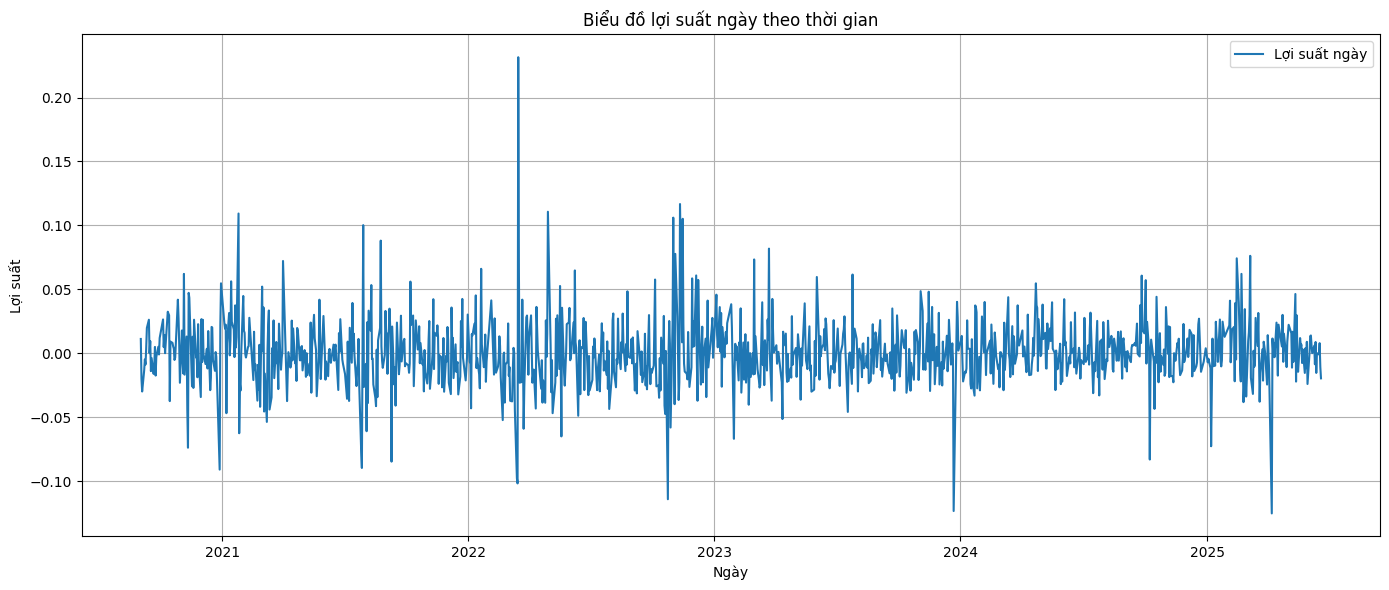

In [113]:
df_after_check['Daily Return'] = df_after_check['Close'].pct_change()
plt.figure(figsize=(14, 6))
plt.plot(df_after_check['Date'], df_after_check['Daily Return'], label='L·ª£i su·∫•t ng√†y', linewidth=1.5)

plt.title('Bi·ªÉu ƒë·ªì l·ª£i su·∫•t ng√†y theo th·ªùi gian')
plt.xlabel('Ng√†y')
plt.ylabel('L·ª£i su·∫•t')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Ph√¢n ph·ªëi l·ª£i su·∫•t b·∫±ng Histogram ƒë·ªÉ xem l·ª£i su·∫•t n·∫±m trong kho·∫£ng n√†o, ph√¢n ph·ªëi nh∆∞ th·∫ø n√†o.
- C√¥ng th·ª©c ƒë∆∞·ª£c s·ª≠ d·ª•ng:

$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

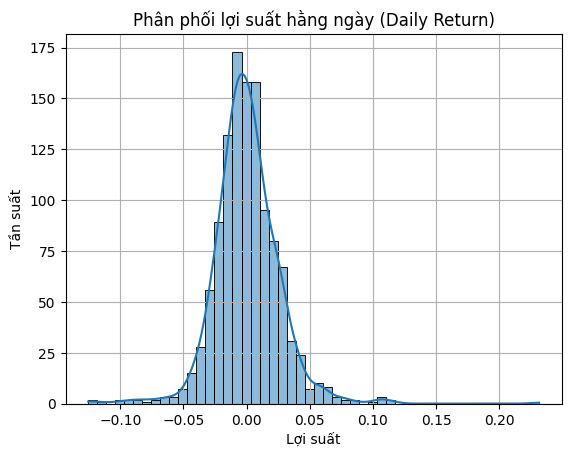

In [114]:
sns.histplot(df_after_check['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Ph√¢n ph·ªëi l·ª£i su·∫•t h·∫±ng ng√†y (Daily Return)')
plt.xlabel('L·ª£i su·∫•t')
plt.ylabel('T·∫ßn su·∫•t')
plt.grid(True)
plt.show()


**1.5.2** T√≠nh ƒë·ªô bi·∫øn ƒë·ªông (volatility) theo th√°ng ho·∫∑c qu√Ω:


- ƒê·ªô bi·∫øn ƒë·ªông theo th√°ng/qu√Ω ƒë∆∞·ª£c t√≠nh b·∫±ng ƒë·ªô l·ªách chu·∫©n c·ªßa l·ª£i su·∫•t h·∫±ng ng√†y trong t·ª´ng th√°ng/qu√Ω ƒë√≥. Qua ƒë√≥, c√≥ th·ªÉ x√°c ƒë·ªãnh ƒë∆∞·ª£c c√°c giai ƒëo·∫°n gi√° c·ªï phi·∫øu dao ƒë·ªông m·∫°nh.


V√¨ th·ªùi gian kh·∫£o s√°t l√† t∆∞∆°ng ƒë·ªëi d√†i (5 nƒÉm), ta s·∫Ω ∆∞u ti√™n t√≠nh ƒë·ªô bi·∫øn ƒë·ªông theo qu√Ω ƒë·ªÉ d·ªÖ d√†ng theo d√µi to√†n b·ªô d·ªØ li·ªáu

In [115]:
df_after_check['Quarter'] = df_after_check['Date'].dt.to_period('Q')
quarter_volatility = df_after_check.groupby('Quarter')['Daily Return'].std()
display(quarter_volatility)

C:\Users\Admin\AppData\Local\Temp\ipykernel_26448\1327189495.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_after_check['Quarter'] = df_after_check['Date'].dt.to_period('Q')
C:\Users\Admin\AppData\Local\Temp\ipykernel_26448\1327189495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_check['Quarter'] = df_after_check['Date'].dt.to_period('Q')


Quarter
2020Q3    0.013867
2020Q4    0.027629
2021Q1    0.029914
2021Q2    0.019013
2021Q3    0.033509
2021Q4    0.020555
2022Q1    0.043563
2022Q2    0.030369
2022Q3    0.018316
2022Q4    0.039751
2023Q1    0.026445
2023Q2    0.019437
2023Q3    0.017988
2023Q4    0.024704
2024Q1    0.019814
2024Q2    0.018295
2024Q3    0.016611
2024Q4    0.020543
2025Q1    0.027322
2025Q2    0.022666
Freq: Q-DEC, Name: Daily Return, dtype: float64

**1.5.3**  ‚Ä¢ Ph√¢n t√≠ch t∆∞∆°ng quan gi·ªØa gi√° ƒë√≥ng c·ª≠a v√† c√°c ch·ªâ s·ªë SMA, RSI.


           Close    SMA_20       RSI
Close   1.000000  0.969719  0.190730
SMA_20  0.969719  1.000000 -0.023016
RSI     0.190730 -0.023016  1.000000


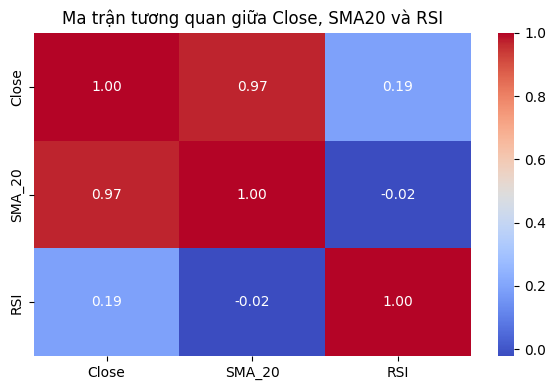

In [116]:
corr_data = df_after_check[['Close', 'SMA_20', 'RSI']].dropna()

correlation_matrix = corr_data.corr()
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa Close, SMA20 v√† RSI")
plt.tight_layout()
plt.show()


### **1.5.** Tr·ª±c quan h√≥a d·ªØ li·ªáu:

#### 1.5.1  Bi·ªÉu ƒë·ªì gi√° ƒë√≥ng c·ª≠a k√®m SMA, EMA:

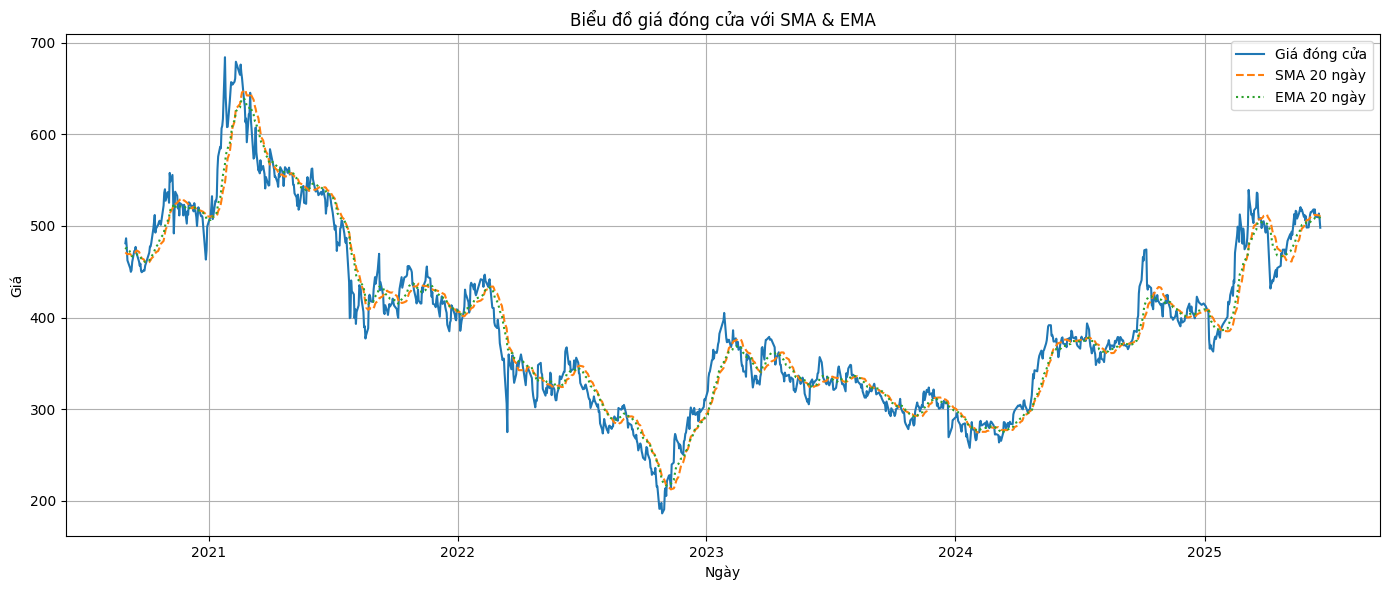

In [117]:
plt.figure(figsize=(14, 6))
plt.plot(df_after_check['Date'], df_after_check['Close'], label='Gi√° ƒë√≥ng c·ª≠a', linewidth=1.5)
plt.plot(df_after_check['Date'], df_after_check['SMA_20'], label='SMA 20 ng√†y', linestyle='--')
plt.plot(df_after_check['Date'], df_after_check['EMA20'], label='EMA 20 ng√†y', linestyle=':')
plt.title('Bi·ªÉu ƒë·ªì gi√° ƒë√≥ng c·ª≠a v·ªõi SMA & EMA')
plt.xlabel('Ng√†y')
plt.ylabel('Gi√°')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 1.5.2  Bi·ªÉu ƒë·ªì histogram c·ªßa l·ª£i su·∫•t:

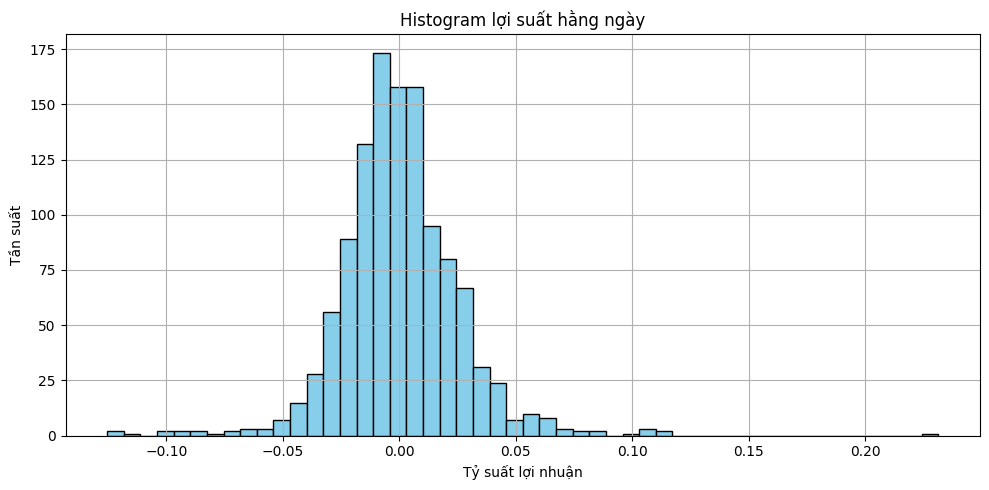

In [118]:
plt.figure(figsize=(10, 5))
plt.hist(df_after_check['Daily Return'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram l·ª£i su·∫•t h·∫±ng ng√†y')
plt.xlabel('T·ª∑ su·∫•t l·ª£i nhu·∫≠n')
plt.ylabel('T·∫ßn su·∫•t')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 1.5.3 Heatmap ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn:

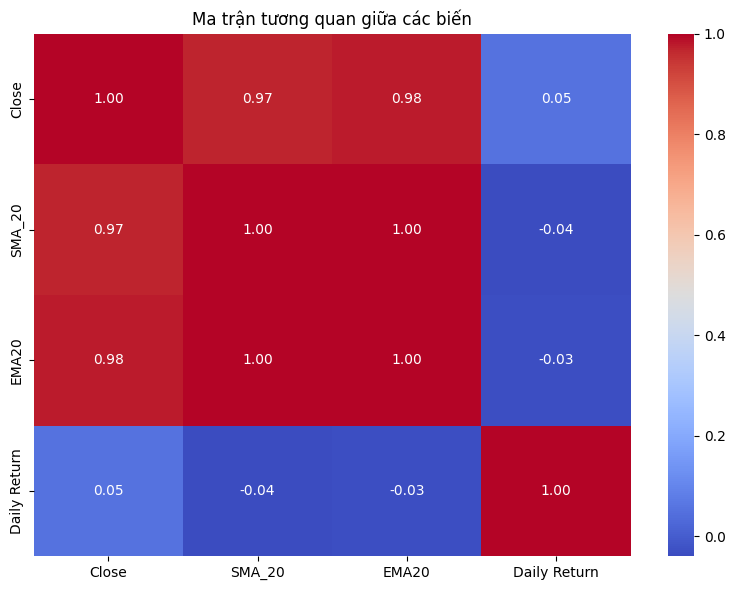

In [119]:
correlation_matrix = df_after_check[['Close', 'SMA_20', 'EMA20', 'Daily Return']].dropna().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn')
plt.tight_layout()
plt.show()

### Bonus: Ph√¢n t√≠ch ƒë∆°n gi·∫£n m·ªôt v√†i c·ªï phi·∫øu c√≥ li√™n quan:
C·ªï phi·∫øu ƒë∆∞·ª£c ch·ªçn ƒë·ªÉ so s√°nh v√† ti·∫øn h√†nh ƒë√°nh gi√° kh√°ch quan v·ªõi Tencent l√† 3 m√£ c·ªßa Alibaba (9988.HK), Baidu (9888.HK) v√† NetEast (9999.HK)

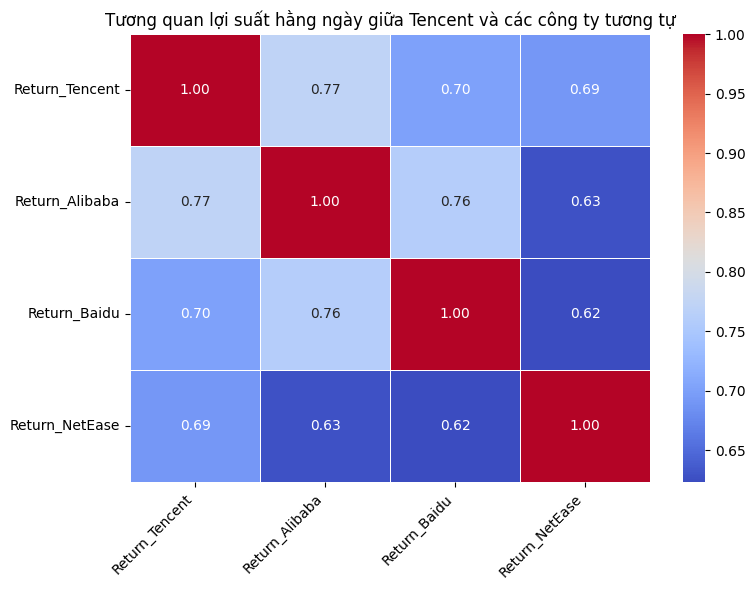

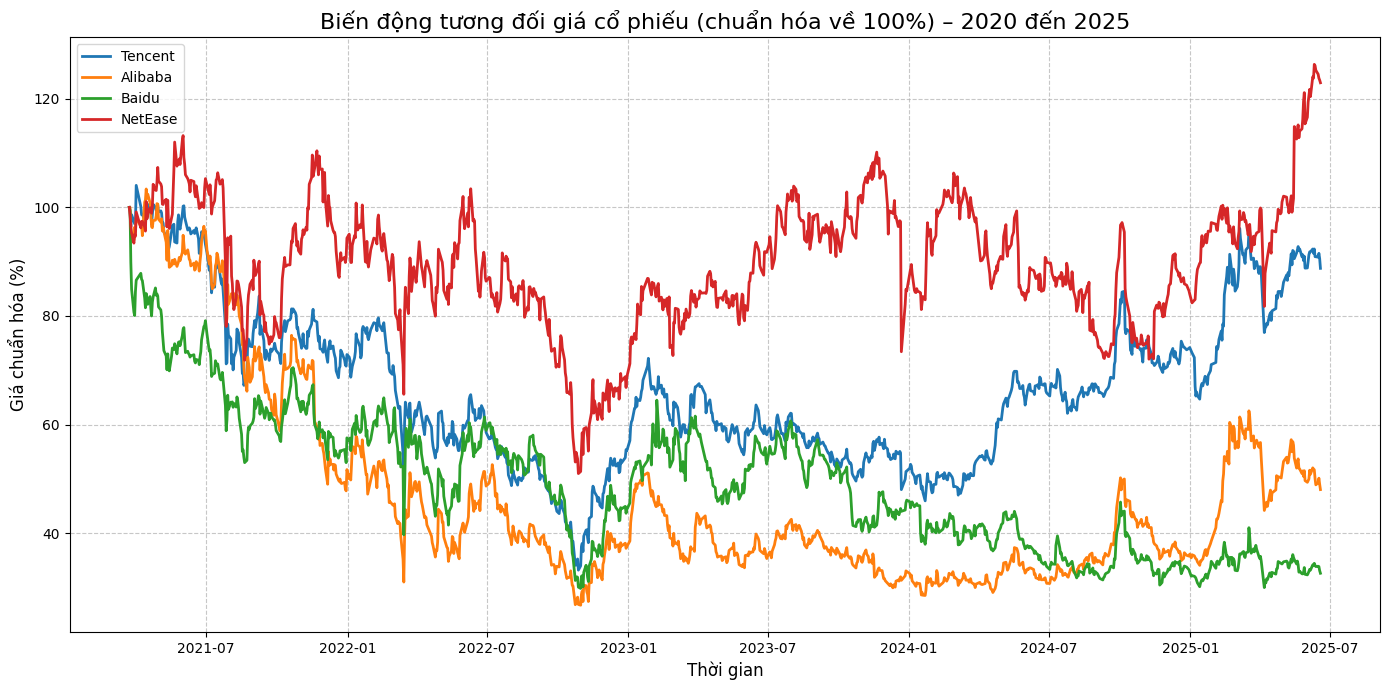

In [120]:
tickers = {
    "Tencent": "0700.HK",
    "Alibaba": "9988.HK",
    "Baidu": "9888.HK",
    "NetEase": "9999.HK"
}

df_returns = pd.DataFrame()
df_normalized_prices = pd.DataFrame()

for name, code in tickers.items():
    df = yf.Ticker(code).history(period="5y").reset_index()
    df['Date'] = pd.to_datetime(df['Date'])
    df[f'Return_{name}'] = df['Close'].pct_change()

    if df_returns.empty:
        df_returns = df[['Date', f'Return_{name}']]
    else:
        df_returns = pd.merge(df_returns, df[['Date', f'Return_{name}']], on='Date', how='inner')

    df_temp_price = df[['Date', 'Close']].rename(columns={"Close": name})
    if df_normalized_prices.empty:
        df_normalized_prices = df_temp_price
    else:
        df_normalized_prices = pd.merge(df_normalized_prices, df_temp_price, on="Date", how="inner")

corr = df_returns.dropna().set_index('Date').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("T∆∞∆°ng quan l·ª£i su·∫•t h·∫±ng ng√†y gi·ªØa Tencent v√† c√°c c√¥ng ty t∆∞∆°ng t·ª±")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

df_norm_plot = df_normalized_prices.copy()
for name in tickers:
    df_norm_plot[name] = df_norm_plot[name] / df_norm_plot[name].iloc[0] * 100

plt.figure(figsize=(14, 7))
for name in tickers:
    plt.plot(df_norm_plot['Date'], df_norm_plot[name], label=name, linewidth=2)

plt.title("Bi·∫øn ƒë·ªông t∆∞∆°ng ƒë·ªëi gi√° c·ªï phi·∫øu (chu·∫©n h√≥a v·ªÅ 100%) ‚Äì 2020 ƒë·∫øn 2025", fontsize=16)
plt.xlabel("Th·ªùi gian", fontsize=12)
plt.ylabel("Gi√° chu·∫©n h√≥a (%)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 1.7 Di·ªÖn gi·∫£i v√† r√∫t ra k·∫øt lu·∫≠n:

Theo nh∆∞ ph√¢n t√≠ch v√† tr·ª±c quan h√≥a, d·ªÖ d√†ng nh·∫≠n th·∫•y ƒë∆∞·ª£c: C√°c c·ªï phi·∫øu c√≥ ƒë·ªô t∆∞∆°ng quan l·ªõn v·ªõi nhau (m·ªçi ch·ªâ s·ªë t∆∞∆°ng quan l·ª£i su·∫•t ng√†y ƒë·ªÅu n·∫±m trong kho·∫£ng t·ª´ x·∫•p x·ªâ 0,7 ƒë·∫øn 1), ch·ª©ng t·ªè m·ª©c ƒë·ªô ph·ª• thu·ªôc l·ªõn v√†o xu h∆∞·ªõng chung c·ªßa th·ªã tr∆∞·ªùng v√† c√°c bi·∫øn ƒë·ªông x√£ h·ªôi. 



 Xu h∆∞·ªõng ch√≠nh

- Trong giai ƒëo·∫°n **2020‚Äì2021**, gi√° c·ªï phi·∫øu **Tencent** tƒÉng m·∫°nh, ƒë·∫°t ƒë·ªânh v√†o gi·ªØa nƒÉm 2021. ƒê√¢y l√† th·ªùi ƒëi·ªÉm th·ªã tr∆∞·ªùng ph·ª•c h·ªìi h·∫≠u COVID v√† Tencent h∆∞·ªüng l·ª£i t·ª´ s·ª± tƒÉng tr∆∞·ªüng c·ªßa game, m·∫°ng x√£ h·ªôi v√† fintech.
- T·ª´ cu·ªëi nƒÉm 2021 ƒë·∫øn h·∫øt 2023, gi√° c·ªï phi·∫øu gi·∫£m s√¢u do ·∫£nh h∆∞·ªüng t·ª´ c√°c ch√≠nh s√°ch **si·∫øt ch·∫∑t Big Tech** c·ªßa ch√≠nh ph·ªß Trung Qu·ªëc, ƒë·∫∑c bi·ªát trong m·∫£ng d·ªØ li·ªáu, gi√°o d·ª•c v√† game.
- T·ª´ ƒë·∫ßu 2024, gi√° c·ªï phi·∫øu c√≥ d·∫•u hi·ªáu ph·ª•c h·ªìi khi **ch√≠nh s√°ch d·∫ßn n·ªõi l·ªèng**, v√† nh√† n∆∞·ªõc t√≠ch c·ª±c h·ªó tr·ª£ ng√†nh c√¥ng ngh·ªá trong n∆∞·ªõc.



 C√°c giai ƒëo·∫°n bi·∫øn ƒë·ªông cao

- **2021‚Äì2022** l√† th·ªùi k·ª≥ bi·∫øn ƒë·ªông m·∫°nh nh·∫•t, do t√°c ƒë·ªông ch√≠nh s√°ch b·∫•t ng·ªù v√† t√¢m l√Ω th·ªã tr∆∞·ªùng ti√™u c·ª±c.
- **ƒê·∫ßu 2020 v√† cu·ªëi 2023** l√† hai giai ƒëo·∫°n c√≥ **bi·∫øn ƒë·ªông th·∫•p**, ph·∫£n √°nh t√¢m l√Ω ch·ªù ƒë·ª£i ho·∫∑c gi·∫£m k·ª≥ v·ªçng ƒë·∫ßu t∆∞.



 So s√°nh v·ªõi c√°c c·ªï phi·∫øu c√πng ng√†nh

| Y·∫øu t·ªë                     | **Tencent**                     | **NetEase**                       | **Alibaba**                      | **Baidu**                         |
|----------------------------|----------------------------------|-----------------------------------|----------------------------------|-----------------------------------|
| **M·∫£ng ch√≠nh**            | Game, WeChat, fintech, ƒë·∫ßu t∆∞   | Game                              | TMƒêT, ƒëi·ªán to√°n ƒë√°m m√¢y, logistics | AI, t√¨m ki·∫øm, xe t·ª± l√°i           |
| **R·ªßi ro ch√≠nh s√°ch**     | V·ª´a                              | Th·∫•p                              | Cao                               | Trung b√¨nh                        |
| **Hi·ªáu su·∫•t 5 nƒÉm**       | Gi·∫£m r·ªìi h·ªìi ph·ª•c                | TƒÉng m·∫°nh                         | Gi·∫£m s√¢u                          | Dao ƒë·ªông m·∫°nh, ph·ª• thu·ªôc AI       |
| **ƒê·∫ßu t∆∞ qu·ªëc t·∫ø**        | M·∫°nh (Riot, Epic...)             | Trung b√¨nh                        | M·∫°nh (Lazada, SEA)               | √çt                                |
| **AI / c√¥ng ngh·ªá m·ªõi**    | Hunyuan LLM, AI game, WeBank AI | Game AI, nh·∫≠n di·ªán h√¨nh ·∫£nh       | Alibaba Cloud, LLM ri√™ng          | LLM Ernie, AI d·∫´n ƒë·∫ßu TQ          |
| **H·ªá sinh th√°i r·ªông**     | R·∫•t r·ªông (WeChat, game, t√†i ch√≠nh) | Trung b√¨nh (game-focused)       | R·ªông (TMƒêT, logistics)            | H·∫πp (ch·ªß y·∫øu AI, search)          |


### Khuy·∫øn ngh·ªã ƒë·∫ßu t∆∞ chi ti·∫øt

D·ª±a tr√™n ph√¢n t√≠ch bi·∫øn ƒë·ªông gi√° c·ªï phi·∫øu, t∆∞∆°ng quan tin t·ª©c ‚Äì ch√≠nh s√°ch, v√† so s√°nh v·ªõi c√°c doanh nghi·ªáp c√πng ng√†nh t·∫°i Trung Qu·ªëc, **Tencent Holdings Limited (0700.HK)** l√† c·ªï phi·∫øu ƒë∆∞·ª£c **∆∞u ti√™n cao nh·∫•t** trong danh m·ª•c ƒë·∫ßu t∆∞ c√¥ng ngh·ªá. C√°c l√Ω do chi ti·∫øt nh∆∞ sau:



#### üîπ 1. Tencent ‚Äì C·ªët l√µi c·ªßa h·ªá sinh th√°i c√¥ng ngh·ªá Trung Qu·ªëc

**Khuy·∫øn ngh·ªã: MUA V√Ä T√çCH L≈®Y D√ÄI H·∫†N**

- **V·ªã th·∫ø ƒë·ªôc t√¥n trong h·ªá sinh th√°i s·ªë**: Tencent ki·ªÉm so√°t *WeChat*, c·ªïng v√†o ch√≠nh c·ªßa ƒë·ªùi s·ªëng s·ªë ng∆∞·ªùi d√¢n Trung Qu·ªëc ‚Äì k·∫øt h·ª£p game, thanh to√°n, tin nh·∫Øn, th∆∞∆°ng m·∫°i, AI, y t·∫ø,... ƒê√¢y l√† l·ª£i th·∫ø ƒë·ªôc nh·∫•t v√¥ nh·ªã.
- **Danh m·ª•c ƒë·∫ßu t∆∞ chi·∫øn l∆∞·ª£c c·ª±c k·ª≥ r·ªông**: Tencent l√† nh√† ƒë·∫ßu t∆∞ l·ªõn c·ªßa h√†ng ch·ª•c c√¥ng ty ni√™m y·∫øt l·ªõn t·∫°i TQ v√† qu·ªëc t·∫ø (Meituan, JD, Pinduoduo, Epic, Riot...), gi√∫p tƒÉng gi√° tr·ªã n·ªôi t·∫°i l√¢u d√†i b·∫•t ch·∫•p bi·∫øn ƒë·ªông ng√†nh.
- **Chuy·ªÉn h∆∞·ªõng m·∫°nh m·∫Ω sang AI v√† d·ªãch v·ª• ƒë√°m m√¢y**: Tencent ƒë√£ ph√°t tri·ªÉn m√¥ h√¨nh AI Hunyuan v√† ƒëang t√≠ch h·ª£p s√¢u v√†o h·ªá sinh th√°i. V·ªõi d·ªØ li·ªáu ng∆∞·ªùi d√πng kh·ªïng l·ªì t·ª´ WeChat v√† QQ, Tencent c√≥ l·ª£i th·∫ø v∆∞·ª£t tr·ªôi trong hu·∫•n luy·ªán m√¥ h√¨nh AI so v·ªõi Baidu ho·∫∑c Alibaba.
- **T√†i ch√≠nh ·ªïn ƒë·ªãnh, ch√≠nh s√°ch c·ªï ƒë√¥ng th√¢n thi·ªán**: L·ª£i nhu·∫≠n b·ªÅn v·ªØng, d√≤ng ti·ªÅn m·∫°nh, th∆∞·ªùng xuy√™n mua l·∫°i c·ªï phi·∫øu v√† chia c·ªï t·ª©c.

üìä **Ch·ªâ s·ªë ƒë·ªãnh l∆∞·ª£ng (2024)**:
| Ch·ªâ s·ªë        | Gi√° tr·ªã g·∫ßn nh·∫•t |
|---------------|------------------|
| P/E           | ~16.2            |
| ROE           | >20%             |
| N·ª£/V·ªën ch·ªß    | < 35%            |
| TƒÉng tr∆∞·ªüng EPS 5 nƒÉm | ~15%/nƒÉm   |

Nh√¨n chung, Tencent l√† **m·ªôt trong nh·ªØng c·ªï phi·∫øu c√¥ng ngh·ªá hi·∫øm hoi c·ªßa Trung Qu·ªëc** v·ª´a c√≥ h·ªá sinh th√°i m·∫°nh, v·ª´a √≠t ph·ª• thu·ªôc duy nh·∫•t v√†o m·ªôt d√≤ng doanh thu. ƒêi·ªÅu n√†y gi√∫p Tencent ch·ªëng ch·ªãu t·ªët trong giai ƒëo·∫°n bi·∫øn ƒë·ªông ch√≠nh s√°ch 2021‚Äì2023 v√† s·∫µn s√†ng b·∫≠t l·∫°i khi th·ªã tr∆∞·ªùng ·ªïn ƒë·ªãnh.



#### üîπ 2. ƒê·ªëi tr·ªçng so s√°nh ‚Äì C√°c c√¥ng ty c√πng ng√†nh

| C√¥ng ty    | ƒê√°nh gi√° t·ªïng quan | Vai tr√≤ trong ph√¢n t√≠ch |Khuy·∫øn ngh·ªã|
|------------|---------------------|--------------------------|---|
| **NetEase** | TƒÉng ·ªïn ƒë·ªãnh, √≠t b·ªã ·∫£nh h∆∞·ªüng ch√≠nh s√°ch, t·∫≠p trung v√†o game. | L√† ƒë·ªëi th·ªß game tr·ª±c ti·∫øp, nh∆∞ng quy m√¥ v√† ti·ªÅm l·ª±c AI y·∫øu h∆°n Tencent. |Gi·ªØ ho·∫∑c mua ng·∫Øn h·∫°n/trung h·∫°n|
| **Alibaba** | T√°i c·∫•u tr√∫c s√¢u, c√≥ r·ªßi ro t·ª´ c·∫°nh tranh n·ªôi ƒë·ªãa v√† ch√≠nh s√°ch. | D√πng l√†m ƒë·ªëi ch·ª©ng v·ªÅ chi·∫øn l∆∞·ª£c t√°i c·∫•u tr√∫c v√† ph√¢n m·∫£nh h·ªá sinh th√°i. |Theo d√µi ho·∫∑c mua ch·ªçn l·ªçc|
| **Baidu**   | M·∫°nh v·ªÅ AI, y·∫øu v·ªÅ d√≤ng ti·ªÅn v√† ph·ª• thu·ªôc v√†o m·∫£ng search. | D√πng so s√°nh v·ªÅ nƒÉng l·ª±c AI v√† ·ª©ng d·ª•ng v√†o th·ª±c t·∫ø. |R·ªßi ro cao|

C√°c c√¥ng ty n√†y mang t√≠nh tham kh·∫£o, nh∆∞ng **kh√¥ng c√≥ c√¥ng ty n√†o s·ªü h·ªØu h·ªá sinh th√°i v√† kh·∫£ nƒÉng c√¢n b·∫±ng r·ªßi ro nh∆∞ Tencent**.



###  **Chi·∫øn l∆∞·ª£c ƒë·∫ßu t∆∞ ƒë·ªÅ xu·∫•t**

> Trong b·ªëi c·∫£nh Trung Qu·ªëc d·∫ßn chuy·ªÉn t·ª´ si·∫øt ch·∫∑t sang h·ªó tr·ª£ c√¥ng ngh·ªá, **Tencent l√† c·ªï phi·∫øu tr·ªçng t√¢m n√™n t√≠ch l≈©y ƒë·ªãnh k·ª≥**, theo chi·∫øn l∆∞·ª£c ƒë·∫ßu t∆∞ gi√° tr·ªã ‚Äì d√†i h·∫°n (3‚Äì5 nƒÉm).
>
> N√™n k·∫øt h·ª£p chi·∫øn l∆∞·ª£c DCA (Dollar Cost Averaging ‚Äì mua ƒë·ªãnh k·ª≥), theo d√µi c√°c t√≠n hi·ªáu vƒ© m√¥ nh∆∞ ch√≠nh s√°ch h·ªó tr·ª£ doanh nghi·ªáp c√¥ng ngh·ªá, ch√≠nh s√°ch AI, tƒÉng tr∆∞·ªüng n·ªôi ƒë·ªãa... ƒë·ªÉ gia tƒÉng t·ª∑ tr·ªçng n·∫øu ƒëi·ªÅu ki·ªán thu·∫≠n l·ª£i.
>
> **Tencent kh√¥ng ph·∫£i l√† c·ªï phi·∫øu tƒÉng n√≥ng**, nh∆∞ng l√† l·ª±a ch·ªçn **an to√†n v√† b·ªÅn v·ªØng** cho nh√† ƒë·∫ßu t∆∞ c√≥ t·∫ßm nh√¨n.

